<a href="https://colab.research.google.com/github/bbishal12/Quiz0/blob/main/Final_Recreating_Masters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bishal Budhathoki

#East Central University

#Spring 2022

#CPSMA 4313

#EPL Visual History 2020-2021 Participants

#Project: Recreating the Master

#Instructor: Dr. Nicholas C Jacob



The recreate master graph is the EPL Visual History of 2020-2021 Participants. The link for the data visualization graph is https://public.tableau.com/app/profile/bo.mccready8742/viz/PremierLeagueTeams20-21VisualHistory/Histories

The picture of the graph is given below.

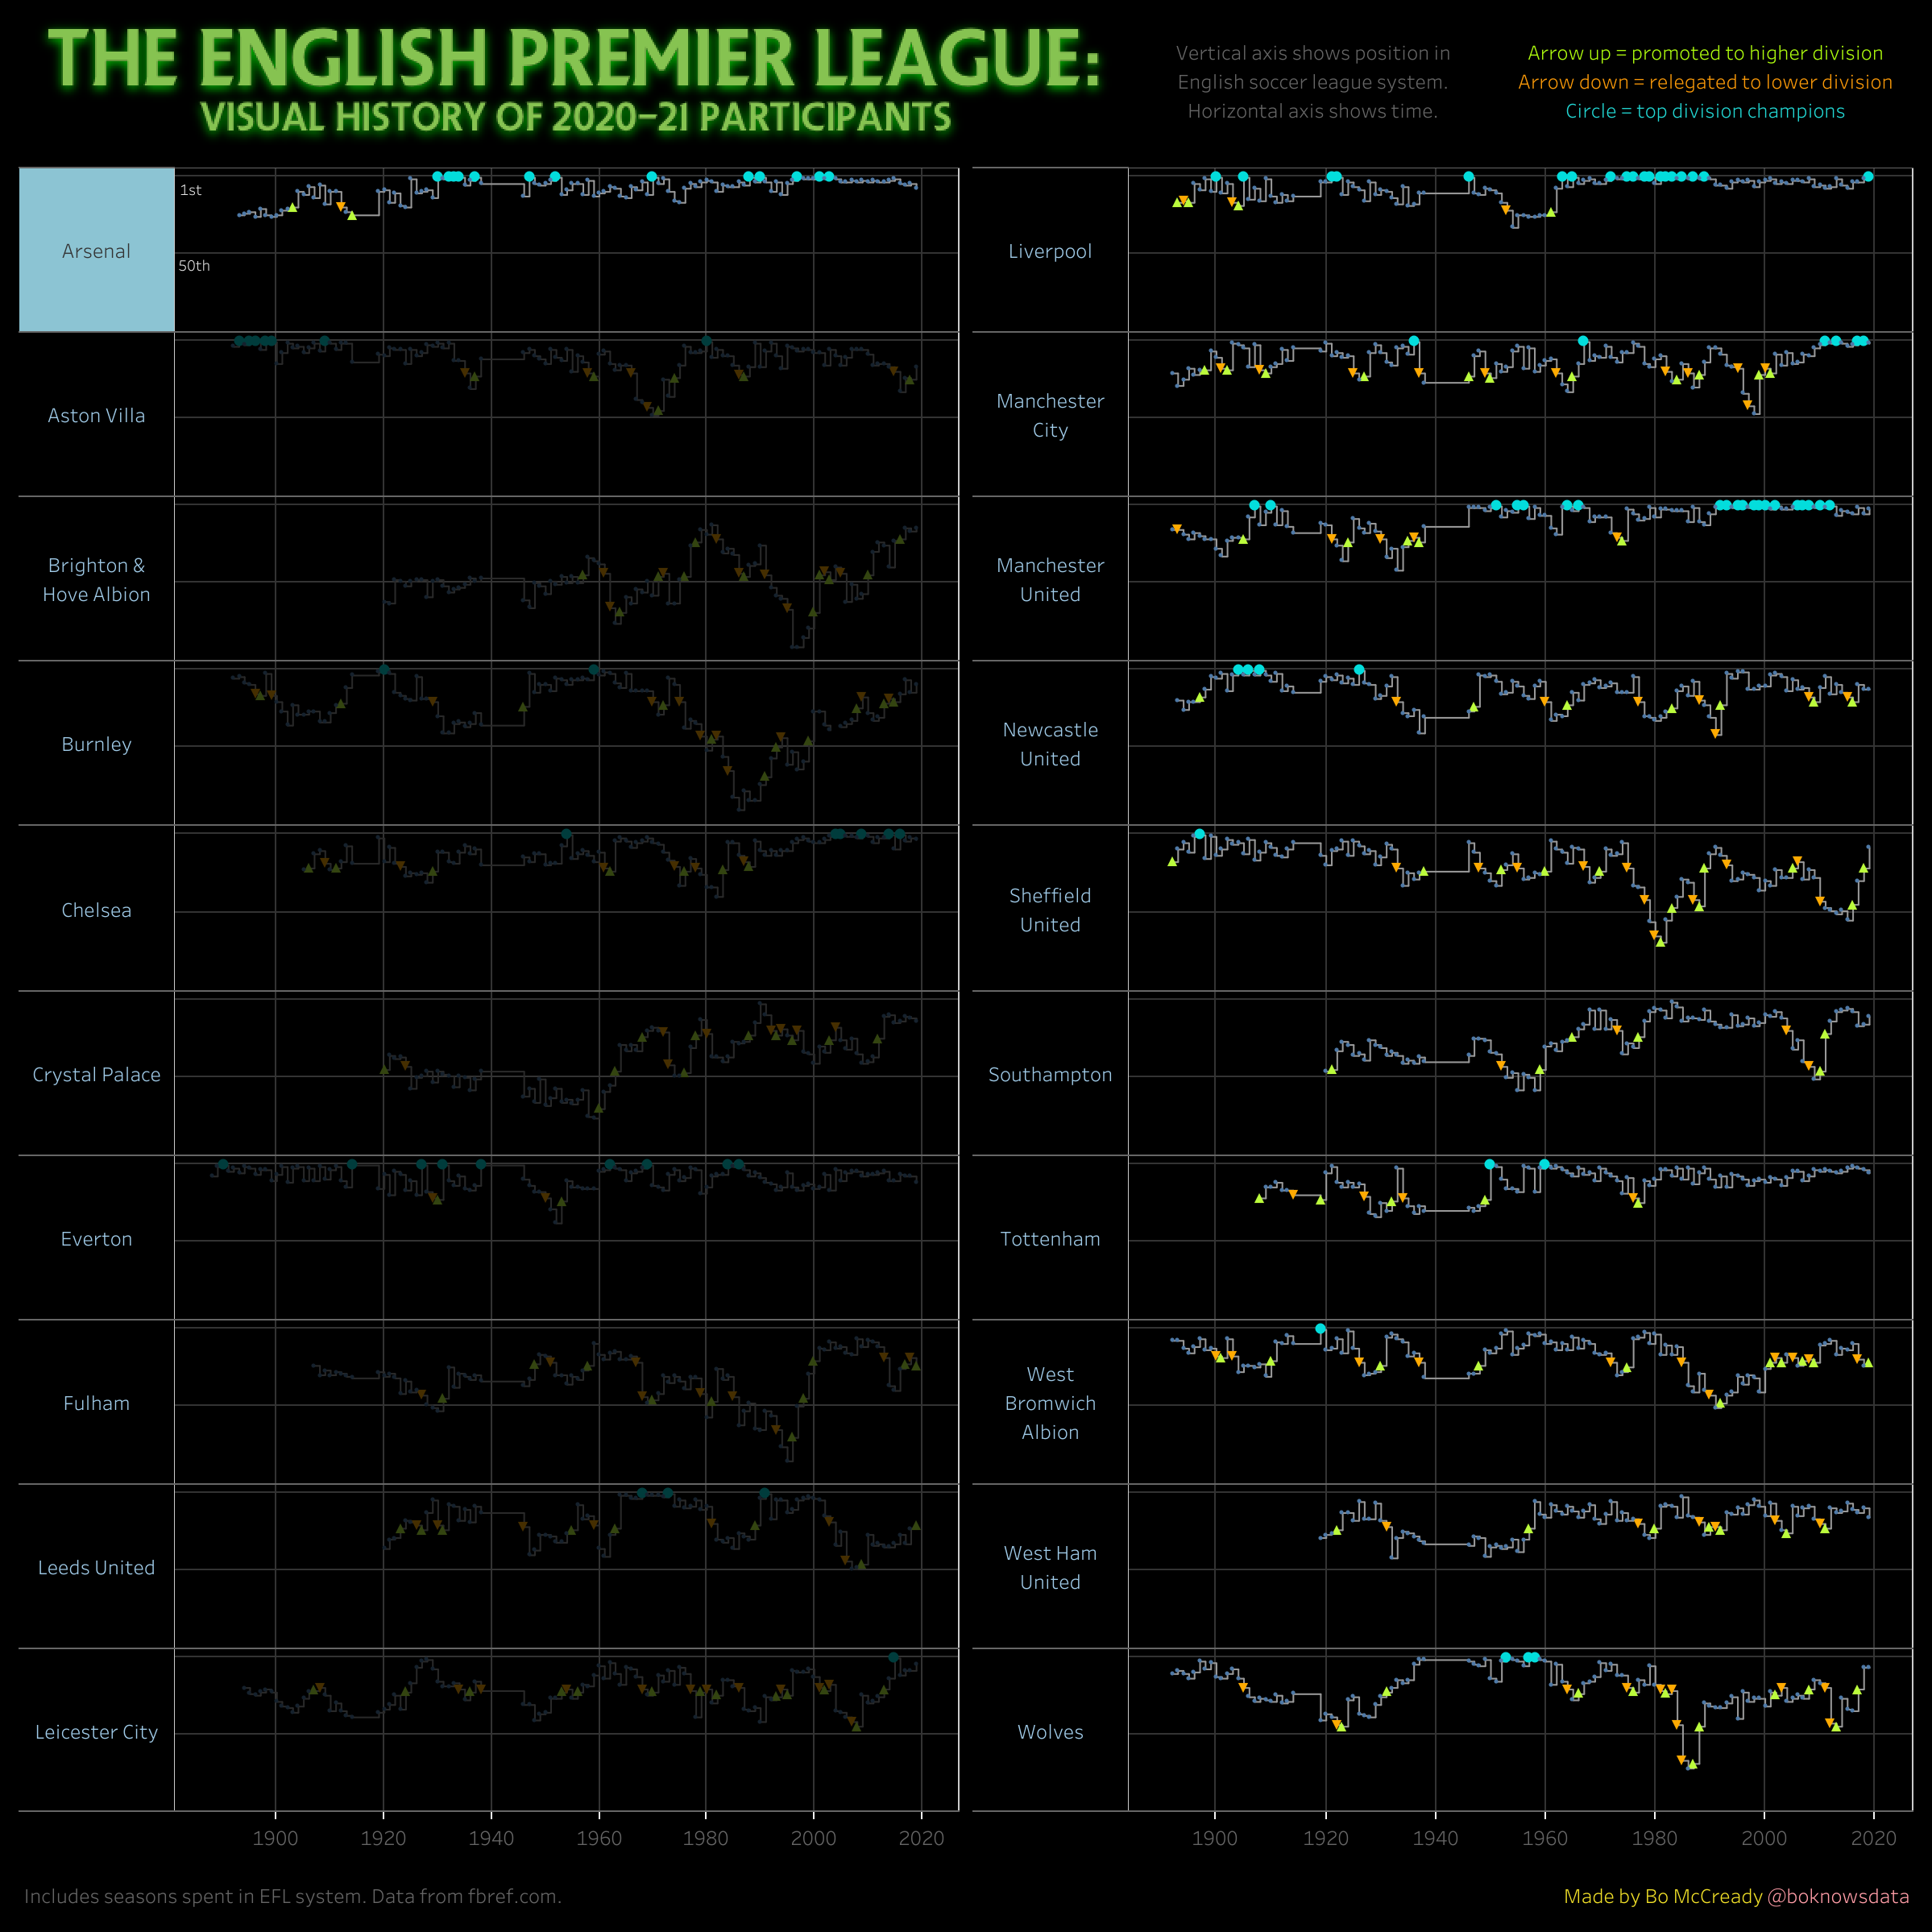

###**Libraries loaded**

In [2]:
import requests
import pandas as pa
import seaborn as sns
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 5)
#from matplotlib.pyplot import figure




###**Pandas as a Dataframe** 

In [3]:
r = requests.get('https://github.com/bbishal12/Quiz0/blob/main/1st%2010_data.csv')
html_contents = r.text
html_soup = BeautifulSoup(html_contents,"lxml")
len(html_soup.find_all('table'))

1

In [4]:
html_soup.title

<title>Quiz0/1st 10_data.csv at main · bbishal12/Quiz0 · GitHub</title>

###**Table**

In [5]:
tables = html_soup.find_all('table')

df = pa.read_html(str(tables))[0]
df

,Unnamed: 0,Team,YearStart,Size,Special,SpecialAlt,RunningTopTierYears,TotalTopTierYears,Division,Leading Scorer,Special.1,SpecialAlt.1,D,L,Position Cleaned,PositionAdjusted,TopTier?,W
0,NaN,Arsenal,1893,NaN,NaN,NaN,0.0,0.0,Div 2,James Henderson,NaN,NaN,4,12,9,25.0,0.0,12
1,NaN,Arsenal,1894,NaN,NaN,NaN,0.0,0.0,Div 2,Peter Mortimer,NaN,NaN,6,10,8,24.0,0.0,14
2,NaN,Arsenal,1895,NaN,NaN,NaN,0.0,0.0,Div 2,Henry Boyd,NaN,NaN,4,12,7,23.0,0.0,14
3,NaN,Arsenal,1896,NaN,NaN,NaN,0.0,0.0,Div 2,Patrick O'Brien,NaN,NaN,4,13,10,26.0,0.0,13
4,NaN,Arsenal,1897,NaN,NaN,NaN,0.0,0.0,Div 2,Fergus Hunt,NaN,NaN,5,9,5,21.0,0.0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2175,NaN,Leicester City,1895,Small,NaN,NaN,0.0,NaN,Div 2,Willie McArthur/Harry Trainer,NaN,NaN,4,12,8,24.0,0.0,14
2176,NaN,Leicester City,1894,Small,NaN,NaN,0.0,NaN,Div 2,David Skea,NaN,NaN,8,7,4,20.0,0.0,15
2177,NaN,Leicester City,1893,Small,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3,2,NaN,NaN,15
2178,NaN,Leicester City,1892,Small,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,9,4,NaN,NaN,12


Now, the above table looks great but I would like to clean it more by recreating the master. To do so, I would like to use the link given by the professor from where I can get idea to recreating the data. https://github.com/nurfnick/Data_Viz/blob/main/RecreatingMasters.ipynb

In [6]:
df.YearStart

0       1893
1       1894
2       1895
3       1896
4       1897
        ... 
2175    1895
2176    1894
2177    1893
2178    1892
2179    1891
Name: YearStart, Length: 2180, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2180 entries, 0 to 2179
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           0 non-null      float64
 1   Team                 2180 non-null   object 
 2   YearStart            2180 non-null   int64  
 3   Size                 1090 non-null   object 
 4   Special              153 non-null    object 
 5   SpecialAlt           194 non-null    object 
 6   RunningTopTierYears  2130 non-null   float64
 7   TotalTopTierYears    1306 non-null   float64
 8   Division             2160 non-null   object 
 9   Leading Scorer       2160 non-null   object 
 10  Special.1            153 non-null    object 
 11  SpecialAlt.1         193 non-null    object 
 12  D                    2180 non-null   int64  
 13  L                    2180 non-null   int64  
 14  Position Cleaned     2180 non-null   int64  
 15  PositionAdjusted     2140 non-null   f

In [8]:
df.isnull()

,Unnamed: 0,Team,YearStart,Size,Special,SpecialAlt,RunningTopTierYears,TotalTopTierYears,Division,Leading Scorer,Special.1,SpecialAlt.1,D,L,Position Cleaned,PositionAdjusted,TopTier?,W
0,True,False,False,True,True,True,False,False,False,False,True,True,False,False,False,False,False,False
1,True,False,False,True,True,True,False,False,False,False,True,True,False,False,False,False,False,False
2,True,False,False,True,True,True,False,False,False,False,True,True,False,False,False,False,False,False
3,True,False,False,True,True,True,False,False,False,False,True,True,False,False,False,False,False,False
4,True,False,False,True,True,True,False,False,False,False,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2175,True,False,False,False,True,True,False,True,False,False,True,True,False,False,False,False,False,False
2176,True,False,False,False,True,True,False,True,False,False,True,True,False,False,False,False,False,False
2177,True,False,False,False,True,True,True,True,True,True,True,True,False,False,False,True,True,False
2178,True,False,False,False,True,True,True,True,True,True,True,True,False,False,False,True,True,False


###**Data Visualization with Multiple steps**

###Graph with one club Arsenal created

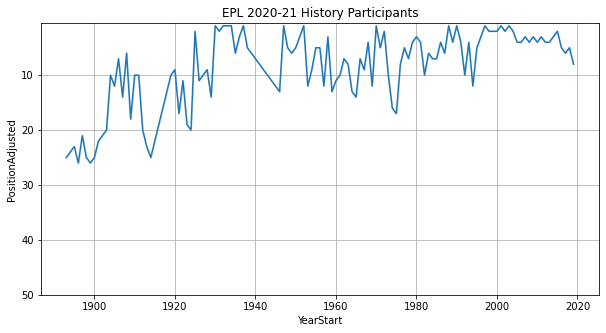

In [9]:
ax = sns.lineplot(x = "YearStart", y= 'PositionAdjusted', data = df[df.Team == 'Arsenal'])
plt.ylim(0.5,50)
ax.invert_yaxis()
plt.title("EPL 2020-21 History Participants")
plt.grid(True) #add grid on the graph


The above graph is the recreate master of the original visualization. The graph is line plot with time series graph. The y-axis is the position adjusted and the x-axis is the year started of the club. This is the line plot for the club **Arsenal** with the year start and the position adjusted.

###Visualization graph with black background for Club Arsenal created

[None]

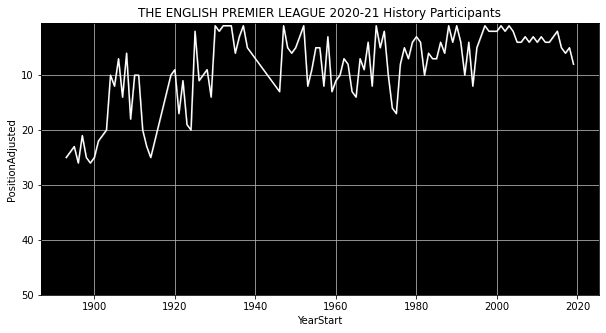

In [10]:
ax = sns.lineplot(x = "YearStart", y= 'PositionAdjusted', color = 'white',data = df[df.Team == 'Arsenal'])
plt.ylim(0.5,50)
ax.invert_yaxis()
plt.title("THE ENGLISH PREMIER LEAGUE 2020-21 History Participants")
plt.grid(True) #add grid on the graph
ax.set(facecolor = "black") #add black color on the background of graph


Here, in the above graph I have added the line grid and black backgraound and also changed line plot color to white.

###Visualization with dotted marker created

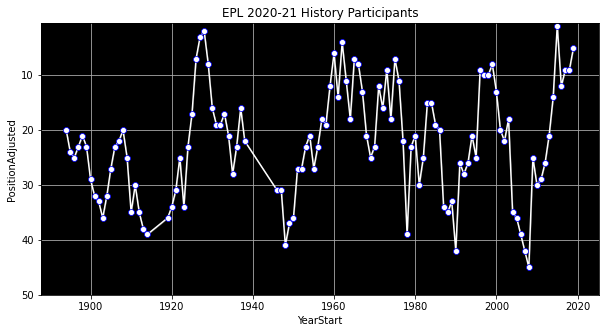

In [11]:
ax = sns.lineplot(x = "YearStart", y= 'PositionAdjusted', color = 'white', marker= 'o', markeredgecolor = 'blue' ,data = df[df.Team == 'Leicester City'])
plt.ylim(0.5,50)
ax.invert_yaxis()
plt.title("EPL 2020-21 History Participants")

ax.set(facecolor = "black") #add black color on the background of graph

#ax.set_yticks([])
plt.grid(True) #add grid on the graph


The above graph is the club Leicester City with the position adjusted on y-axis and year start on x-axis. I do added the dot mark on the line plots.


###Visualization graph for club Leicester city

[Text(0.5, 0, '')]

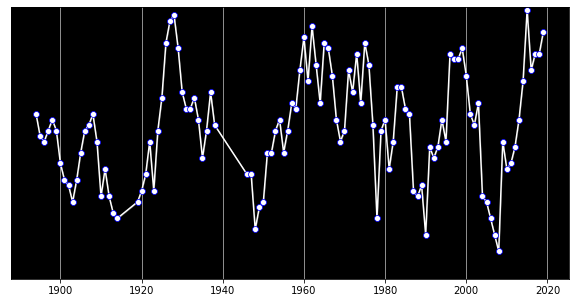

In [12]:
ax = sns.lineplot(x = "YearStart", y= 'PositionAdjusted', color = 'white', marker= 'o', markeredgecolor = 'blue' ,data = df[df.Team == 'Leicester City'])
plt.ylim(0.5,50) #y-axis with starting 50 to 1 

ax.invert_yaxis() #starting with 50 on bottom and 1 on the top
ax.set(facecolor = "black") #add black color on the background of graph
plt.grid(True) #add grid on the graph
plt.yticks([]) 
#plt.title("EPL 2020-21 History Participants", fontsize = '29', color = 'green'
#loc='left', y= 0.9, fontweight='bold')


ax.tick_params(axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

ax.set(ylabel = "")   # remove the label on the y-axis
ax.set(xlabel = "")   # remove the label on the x-axis




I have removed the label of both axes in the above graph of my recreate visualization. Also,removed the y-axis number label.

###Visualization of graph for 3 clubs created:

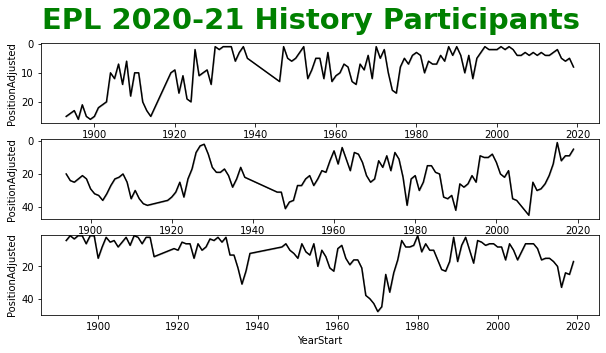

In [13]:
fig, ax = plt.subplots(3)

 
fig.suptitle("EPL 2020-21 History Participants", fontsize = '29', color = 'green',fontweight='bold')
ax[0].invert_yaxis()
ax[1].invert_yaxis()

plt.ylim(0.5,50) #y-axis with starting 50 to 1
sns.lineplot(ax= ax[0] ,x = "YearStart", y= 'PositionAdjusted', color = 'black' ,data = df[df.Team == 'Arsenal'])
sns.lineplot(ax = ax[1],x = "YearStart", y= 'PositionAdjusted', color = 'black' ,data = df[df.Team == 'Leicester City'])
sns.lineplot(ax = ax[2],x = "YearStart", y= 'PositionAdjusted', color = 'black' ,data = df[df.Team == 'Aston Villa'])
ax[2].invert_yaxis()


plt.show()


The above code and graph is my recreate graph of the three different club in the different axes. I have to used 3 axes to get these threee clubs.

###Arrow up and down added in the graph

Text(0.5, 1.0, 'EPL 2020-21 History Participants')

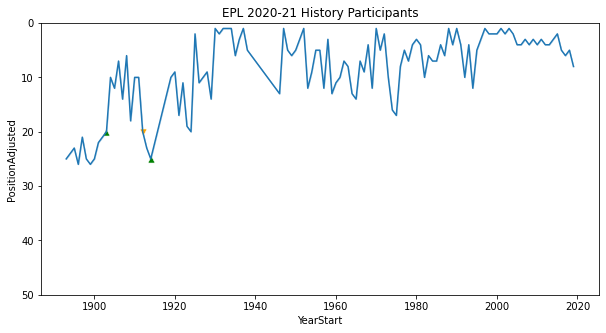

In [14]:
ax = sns.lineplot(x = "YearStart", y= 'PositionAdjusted', data = df[df.Team == 'Arsenal'])
sns.scatterplot(x = 'YearStart', y = 'PositionAdjusted',data = df[(df.Team == 'Arsenal')&(df['Special.1'] == 'Relegated')], marker = "v", color = 'orange', s = 50)
sns.scatterplot(x = 'YearStart', y = 'PositionAdjusted',data = df[(df.Team == 'Arsenal')&(df['Special.1'] == 'Promoted')], marker = "^", color = 'green', s= 50)
plt.ylim(0,50)
ax.invert_yaxis()
plt.title("EPL 2020-21 History Participants")

Here, in this graph I was able to get the triangle shaped up and down arrow (^,v).I used the scattterplot to get the arrow shaped in the line plot of the Arsenal club.

###Title rearranged with orginal visual and marked dotted with blue created

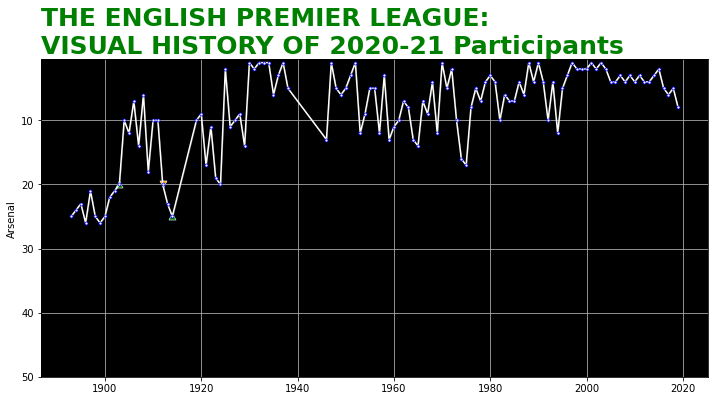

In [15]:
fig, ax = plt.subplots()
fig.tight_layout()
            
ax.set_title("THE ENGLISH PREMIER LEAGUE:\nVISUAL HISTORY OF 2020-21 Participants", fontsize = '25', color = 'green',fontweight='bold', loc = 'left')

plt.ylim(0.5,50) #y-axis with starting 50 to 1

sns.lineplot(x = "YearStart", y= 'PositionAdjusted', color = 'white', marker= '.', markeredgecolor = 'blue' ,data = df[df.Team == 'Arsenal'])
sns.scatterplot(x = 'YearStart', y = 'PositionAdjusted',data = df[(df.Team == 'Arsenal')&(df['Special.1'] == 'Relegated')], marker = "v", color = 'orange', s = 50)
sns.scatterplot(x = 'YearStart', y = 'PositionAdjusted',data = df[(df.Team == 'Arsenal')&(df['Special.1'] == 'Promoted')], marker = "^", color = 'green', s= 50)
ax.set_facecolor("Black")


ax.invert_yaxis()
ax.set(xlabel = "") 

ax.set(ylabel = "Arsenal") 
ax.grid(True)
plt.show()

For the single club Arsenal I am able to change the backgraoud color to the same as original visualization which is black. I also added the white line with blue marked circle plot. 

###Final Recreate Visualization with all the dataframe(dataset) clubs in a single graph

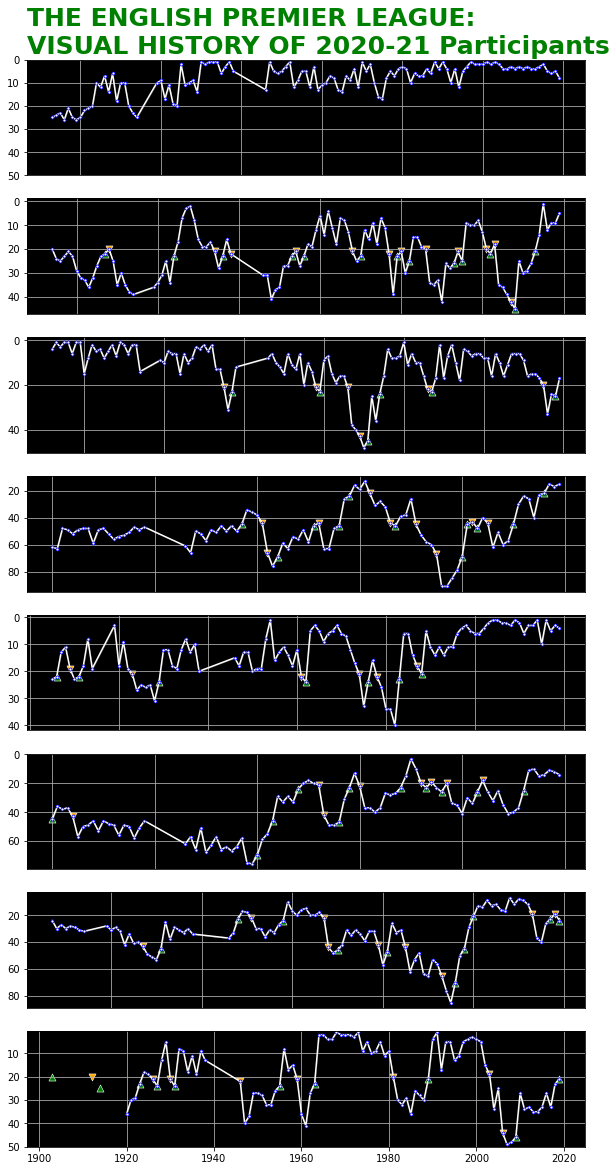

In [26]:
fig, ax = plt.subplots(8)
fig.set_figheight(20)
fig.set_figwidth(10)
fig.set(facecolor = 'white')


ax[0].set_title("THE ENGLISH PREMIER LEAGUE:\nVISUAL HISTORY OF 2020-21 Participants", fontsize = '25', color = 'green',fontweight='bold', loc = 'left')
ax[0].invert_yaxis()
ax[1].invert_yaxis()
ax[2].invert_yaxis()
ax[3].invert_yaxis()
ax[4].invert_yaxis()
ax[5].invert_yaxis()
ax[6].invert_yaxis()

plt.ylim(0.5,50) #y-axis with starting 50 to 1

sns.lineplot(ax= ax[0] ,x = "YearStart", y= 'PositionAdjusted', color = 'white', marker= '.', markeredgecolor = 'blue' ,data = df[df.Team == 'Arsenal'])
sns.scatterplot(x = 'YearStart', y = 'PositionAdjusted',data = df[(df.Team == 'Arsenal')&(df['Special.1'] == 'Relegated')], marker = "v", color = 'orange', s = 50)
sns.scatterplot(x = 'YearStart', y = 'PositionAdjusted',data = df[(df.Team == 'Arsenal')&(df['Special.1'] == 'Promoted')], marker = "^", color = 'green', s= 50)
ax[0].set_facecolor("Black")

sns.lineplot(ax = ax[1],x = "YearStart", y= 'PositionAdjusted', color = 'white', marker= '.', markeredgecolor = 'blue' ,data = df[df.Team == 'Leicester City'])
sns.scatterplot(ax =ax[1],x = 'YearStart', y = 'PositionAdjusted',data = df[(df.Team == 'Leicester City')&(df['Special.1'] == 'Relegated')], marker = "v", color = 'orange', s = 50)
sns.scatterplot(ax =ax[1],x= 'YearStart', y = 'PositionAdjusted',data = df[(df.Team == 'Leicester City')&(df['Special.1'] == 'Promoted')], marker = "^", color = 'green', s= 50)
ax[1].set_facecolor("Black")

sns.lineplot(ax = ax[2],x = "YearStart", y= 'PositionAdjusted', color = 'white', marker= '.', markeredgecolor = 'blue' ,data = df[df.Team == 'Aston Villa'])
sns.scatterplot(ax = ax[2],x = 'YearStart', y = 'PositionAdjusted',data = df[(df.Team == 'Aston Villa')&(df['Special.1'] == 'Relegated')], marker = "v", color = 'orange', s = 50)
sns.scatterplot(ax = ax[2],x = 'YearStart', y = 'PositionAdjusted',data = df[(df.Team == 'Aston Villa')&(df['Special.1'] == 'Promoted')], marker = "^", color = 'green', s= 50)
ax[2].set_facecolor("Black")

sns.lineplot(ax = ax[3],x = "YearStart", y= 'PositionAdjusted', color = 'white', marker= '.', markeredgecolor = 'blue',data = df[df.Team == 'Brighton & Hove Albion'])
sns.scatterplot(ax = ax[3],x = 'YearStart', y = 'PositionAdjusted',data = df[(df.Team == 'Brighton & Hove Albion')&(df['Special.1'] == 'Relegated')], marker = "v", color = 'orange', s = 50)
sns.scatterplot(ax = ax[3],x = 'YearStart', y = 'PositionAdjusted',data = df[(df.Team == 'Brighton & Hove Albion')&(df['Special.1'] == 'Promoted')], marker = "^", color = 'green', s= 50)
ax[3].set_facecolor("Black")

sns.lineplot(ax = ax[4],x = "YearStart", y= 'PositionAdjusted', color = 'white', marker= '.', markeredgecolor = 'blue' ,data = df[df.Team == 'Chelsea'])
sns.scatterplot(ax = ax[4],x = 'YearStart', y = 'PositionAdjusted',data = df[(df.Team == 'Chelsea')&(df['Special.1'] == 'Relegated')], marker = "v", color = 'orange', s = 50)
sns.scatterplot(ax = ax[4],x = 'YearStart', y = 'PositionAdjusted',data = df[(df.Team == 'Chelsea')&(df['Special.1'] == 'Promoted')], marker = "^", color = 'green', s= 50)
ax[4].set_facecolor("Black")

sns.lineplot(ax = ax[5],x = "YearStart", y= 'PositionAdjusted', color = 'white', marker= '.', markeredgecolor = 'blue' ,data = df[df.Team == 'Crystal Palace'])
sns.scatterplot(ax = ax[5],x = 'YearStart', y = 'PositionAdjusted',data = df[(df.Team == 'Crystal Palace')&(df['Special.1'] == 'Relegated')], marker = "v", color = 'orange', s = 50)
sns.scatterplot(ax = ax[5],x = 'YearStart', y = 'PositionAdjusted',data = df[(df.Team == 'Crystal Palace')&(df['Special.1'] == 'Promoted')], marker = "^", color = 'green', s= 50)
ax[5].set_facecolor("Black")

sns.lineplot(ax = ax[6],x = "YearStart", y= 'PositionAdjusted', color = 'white', marker= '.', markeredgecolor = 'blue',data = df[df.Team == 'Fulham'])
sns.scatterplot(ax = ax[6],x = 'YearStart', y = 'PositionAdjusted',data = df[(df.Team == 'Fulham')&(df['Special.1'] == 'Relegated')], marker = "v", color = 'orange', s = 50)
sns.scatterplot(ax = ax[6],x = 'YearStart', y = 'PositionAdjusted',data = df[(df.Team == 'Fulham')&(df['Special.1'] == 'Promoted')], marker = "^", color = 'green', s= 50)
ax[6].set_facecolor("Black")

sns.lineplot(ax = ax[7],x = "YearStart", y= 'PositionAdjusted', color = 'white', marker= '.', markeredgecolor = 'blue' ,data = df[df.Team == 'Leeds United'])
sns.scatterplot(ax = ax[7],x = 'YearStart', y = 'PositionAdjusted',data = df[(df.Team == 'Leeds United')&(df['Special.1'] == 'Relegated')], marker = "v", color = 'orange', s = 50)
sns.scatterplot(ax = ax[7],x = 'YearStart', y = 'PositionAdjusted',data = df[(df.Team == 'Leeds United')&(df['Special.1'] == 'Promoted')], marker = "^", color = 'green', s= 50)
ax[7].set_facecolor("Black")

ax[7].invert_yaxis()
ax[0].tick_params(axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)

ax[1].tick_params(axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)

ax[2].tick_params(axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)

ax[3].tick_params(axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)

ax[4].tick_params(axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)

ax[5].tick_params(axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)

ax[6].tick_params(axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
ax[0].set(ylim = [50,0])

#text = ax[0].text(0,10,'Arsenal',horizontalalignment='center') ##references 
#here are to the graphic generated! I tried but the graph was so small and it 
#wasnot looking good so I have to take it off

ax[0].set(ylabel = "")   # remove the label on the y-axis
ax[1].set(ylabel = "") 
ax[2].set(ylabel = "") 
ax[3].set(ylabel = "") 
ax[4].set(ylabel = "") 
ax[5].set(ylabel = "") 
ax[6].set(ylabel = "") 
ax[7].set(ylabel = "") 
ax[0].set(xlabel = "") 
ax[1].set(xlabel = "") 
ax[2].set(xlabel = "") 
ax[3].set(xlabel = "") 
ax[4].set(xlabel = "") 
ax[5].set(xlabel = "") 
ax[6].set(xlabel = "") 
ax[7].set(xlabel = "") 
ax[0].grid(True)
ax[1].grid(True)
ax[2].grid(True)
ax[3].grid(True)
ax[4].grid(True)
ax[5].grid(True)
ax[6].grid(True)
ax[7].grid(True)

plt.show()

This is one of the hard time consuming graph which is the final recreate I tried so far. In this graph, I combined all the corresponding club which I have on my dataset table. There is some club which do not have a data so I have to use whichever club has data in order to plot the graphs. I use the same column which is little different than the original visualizations. I tried to use the 2 column but it was little complicated so I stick with the one column. I did also tried to put the all graphs in same x axis which was very challenging so I have to use subplot for each clubs.

Label: The ^ (arrow up) with the green color is the promoted to higher division and arrow down (v) with orange color is relegated to lower division.

So, this is my recrete visualization for the EPL 2020-21 visual history participants.

###**Errors and Omissions**

While doing this recreate visualization there was a very challenging and time consumed. There was no errors and omissions while I was working in this project. Eventhough the graph doesnot look alike but I tried to make it look similar as of original. I couldnot make the club into two columns and in the same entire graph with same axes. I think thats the only one thing is missing in my recreate visualization. I hope to do better in the future with challenging project.

###**References**

https://public.tableau.com/app/profile/bo.mccready8742/vizPremierLeagueTeams20-21VisualHistory/Histories

https://github.com/nurfnick/Data_Viz

https://github.com/nurfnick/Data_Viz/blob/main/Content/Data_Visualization/AdvancedTechniques.ipynb

https://github.com/bbishal12/Quiz0

https://www.geeksforgeeks.org/plot-multiple-plots-in-matplotlib/

